In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir = "/content/drive/Shareddrives/ECS260-group5/dataset/npm/"
pr_fname = dir + 'PageRank_npm.csv'
depCount_fname  = dir + 'depCount_npm.csv'

# read data
pr_dat = pd.read_csv(pr_fname)
depCount_dat = pd.read_csv(depCount_fname)

In [22]:
pr_and_dc = pr_dat[["ID","Name", "PageRank_value"]].set_index('ID').join(depCount_dat[['ID', 'Dependent Projects Count']].set_index('ID'))
pr_and_dc.head()

,Name,PageRank_value,Dependent Projects Count
ID,,,
167115,lodash,0.012205,103451
1540922,tslib,0.012109,30830
177932,object-assign,0.005654,9209
134974,chalk,0.005333,65228
649359,prop-types,0.005329,36375


In [23]:
pr_and_dc.corr(method='pearson')

,PageRank_value,Dependent Projects Count
PageRank_value,1.000000,0.396561
Dependent Projects Count,0.396561,1.000000


In [24]:
pr_and_dc.corr(method='spearman')

,PageRank_value,Dependent Projects Count
PageRank_value,1.000000,0.871246
Dependent Projects Count,0.871246,1.000000


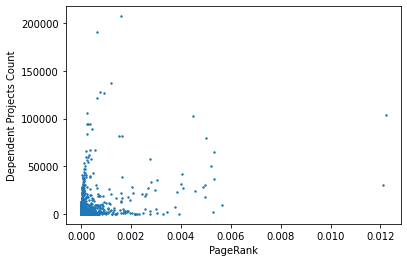

In [32]:
pr_val = []
dc_val = []

for row in pr_and_dc.iterrows():
  d = row[1]
  pr = d['PageRank_value']
  dc = d['Dependent Projects Count']

  pr_val.append(pr)
  dc_val.append(dc)

# Plot PageRank and dependents count on a figure
plt.scatter(pr_val, dc_val, s=2)
plt.xlabel('PageRank')
plt.ylabel('Dependent Projects Count')

plt.show()
plt.close('all')

In [33]:
num = 5000

pr_top = []
for row in pr_dat.iterrows():
  rank = row[1]['Rank']
  name = row[1]['Name']
  if rank <= num: pr_top.append(name)

dc_top = []
for row in depCount_dat.iterrows():
  rank = row[1]['Rank']
  name = row[1]['Name']
  if rank <= num: dc_top.append(name)

In [34]:
intersect = []
for pkg_name in pr_top:
  if pkg_name in dc_top: intersect.append(pkg_name)

print('Total %i packages are in the intersection.' % len(intersect))

Total 2706 packages are in the intersection.
